가설 함수(우리가 예측하는 것) : H(x) = Wx + b<br>
Cost(W, b) = loss function -> 오차 제곱합의 평균<br>
cost를 줄이는 것이 중요한데, cost 줄이는 방법이 바로 Gradient Descent<br>
만약 Convex function 이라면 cost는 무조건 global optimum으로 가지만, 그렇지 않으면 local minimum에 빠질 수도 있음<br>
<h2>Gradient Descent 동작 과정
<ul><li>처음에 파라미터(W, b)를 정한다.</li>
<li> w <- w - alpha * gradient를 이용하여 파라미터를 update한다.</li>
<li> local minimum을 찾을때까지 반복한다</li>
이 과정을 반복하다보면, 접선의 기울기가 크면 클수록 update되는 파라미터 양이 늘어날 수 밖에 없다.

In [1]:
import numpy as np

X = np.array([1, 2, 3])
Y = np.array([1, 3, 4])

def cost_func(W, X, Y):
    c = 0
    for i in range(len(X)):
        c += (W * X[i] - Y[i]) ** 2
    return c / len(X)

for feed_W in np.linspace(-3, 5, num = 15):
    curr_cost = cost_func(feed_W, X, Y)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

-3.000 |   88.66667
-2.429 |   66.95238
-1.857 |   48.28571
-1.286 |   32.66667
-0.714 |   20.09524
-0.143 |   10.57143
 0.429 |    4.09524
 1.000 |    0.66667
 1.571 |    0.28571
 2.143 |    2.95238
 2.714 |    8.66667
 3.286 |   17.42857
 3.857 |   29.23810
 4.429 |   44.09524
 5.000 |   62.00000


-3.000 |   88.66667
-2.429 |   66.95238
-1.857 |   48.28571
-1.286 |   32.66667
-0.714 |   20.09524
-0.143 |   10.57143
 0.429 |    4.09524
 1.000 |    0.66667
 1.571 |    0.28571
 2.143 |    2.95238
 2.714 |    8.66667
 3.286 |   17.42857
 3.857 |   29.23810
 4.429 |   44.09524
 5.000 |   62.00000


(0.0, 75.0)

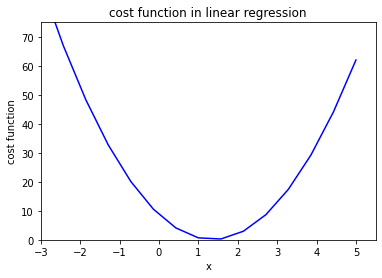

In [2]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
X = np.array([1, 2, 3])
Y = np.array([1, 3, 4])

def cost_func(W, X, Y):
    hypothesis = X * W
    return tf.reduce_mean(tf.square(hypothesis - Y))

W_values = np.linspace(-3, 5, num = 15)
cost_values = []
for feed_W in np.linspace(-3, 5, num = 15):
    curr_cost = cost_func(feed_W, X, Y)
    cost_values.append(curr_cost)
    print("{:6.3f} | {:10.5f}".format(feed_W, curr_cost))

plt.plot(W_values, cost_values, color = 'b')
plt.xlabel('x')
plt.ylabel('cost function')
plt.title('cost function in linear regression')
plt.xlim(-3, 5.5)
plt.ylim(0, 75)

[1.0, 2.0, 3.0, 4.0] [1.5316257498332129, 3.4426059614551083, 5.310053568973129, 7.060789849744508]
    0 |    79.0868 |   4.756475
   10 |    16.6432 |   3.130343
   20 |     3.5115 |   2.384628
   30 |     0.7499 |   2.042657
   40 |     0.1692 |   1.885834
   50 |     0.0470 |   1.813918
   60 |     0.0213 |   1.780939
   70 |     0.0159 |   1.765815
   80 |     0.0148 |   1.758880
   90 |     0.0146 |   1.755699
  100 |     0.0145 |   1.754241
  110 |     0.0145 |   1.753572
  120 |     0.0145 |   1.753265
  130 |     0.0145 |   1.753124
  140 |     0.0145 |   1.753060
  150 |     0.0145 |   1.753030
  160 |     0.0145 |   1.753017
  170 |     0.0145 |   1.753011
  180 |     0.0145 |   1.753008
  190 |     0.0145 |   1.753006
  200 |     0.0145 |   1.753006
  210 |     0.0145 |   1.753006
  220 |     0.0145 |   1.753006
  230 |     0.0145 |   1.753006
  240 |     0.0145 |   1.753006
  250 |     0.0145 |   1.753006
  260 |     0.0145 |   1.753006
  270 |     0.0145 |   1.753006
  28

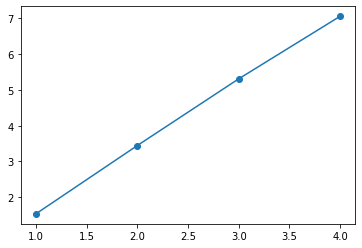

In [3]:
import random

random.seed(2022)
X = [1., 2., 3., 4.]
Y = [1. + random.random(), 3. + random.random(), 5. + random.random(), 7. + random.random()] 

print(X, Y)
plt.scatter(X, Y)
plt.plot(X, Y)
W = tf.Variable([5.0])

for step in range(300):
    hypothesis = W * X
    cost = tf.reduce_mean(tf.square(hypothesis - Y))

    alpha = 0.01
    gradient = tf.reduce_mean(tf.multiply(tf.multiply(W, X) - Y, X))
    descent = W - tf.multiply(alpha, gradient)
    W.assign(descent)

    if step % 10 == 0:
        print('{:5} | {:10.4f} | {:10.6f}'.format(step, cost.numpy(), W.numpy()[0]))

In [7]:
x1 = [73., 93., 89., 96., 73.]
x2 = [80., 88., 91., 98., 66.]
x3 = [75., 98., 84., 83., 91.]
Y = [158., 180., 188., 175., 180.]

w1 = tf.Variable(10)
w2 = tf.Variable(10)
w3 = tf.Variable(10)
b = tf.Variable(10.)

learning_rate = 0.01

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = w1 * x1 + w2 * x2 + w3 * x3 + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])

    w1.assign_sub(learning_rate * w1_grad)
    w2.assign_sub(learning_rate * w2_grad)
    w3.assign_sub(learning_rate * w3_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 50 == 0:
        print("{:5} | {:12.4f}".format(i, cost.numpy()))


InvalidArgumentError: ignored

In [12]:
x1 = [73., 93., 89., 96., 73.]
x2 = [80., 88., 91., 98., 66.]
x3 = [75., 98., 84., 83., 91.]
Y = [158., 180., 188., 175., 180.]

w1 = tf.Variable(tf.random.normal([1]))
w2 = tf.Variable(tf.random.normal([1]))
w3 =tf.Variable(tf.random.normal([1]))
b = tf.Variable(tf.random.normal([1]))

learning_rate = 0.000001

for i in range(1000+1):
    with tf.GradientTape() as tape:
        hypothesis = w1 * x1 + w2 * x2 + w3 * x3 + b
        cost = tf.reduce_mean(tf.square(hypothesis - Y))
    
    w1_grad, w2_grad, w3_grad, b_grad = tape.gradient(cost, [w1, w2, w3, b])

    w1.assign_sub(learning_rate * w1_grad)
    w2.assign_sub(learning_rate * w2_grad)
    w3.assign_sub(learning_rate * w3_grad)
    b.assign_sub(learning_rate * b_grad)

    if i % 50 == 0:
        print("{:5} | {:12.4f}".format(i, cost.numpy()))


    0 |   99185.7031
   50 |    1226.3513
  100 |     124.6150
  150 |     111.6252
  200 |     110.8862
  250 |     110.2974
  300 |     109.7224
  350 |     109.1598
  400 |     108.6089
  450 |     108.0696
  500 |     107.5418
  550 |     107.0251
  600 |     106.5192
  650 |     106.0239
  700 |     105.5392
  750 |     105.0644
  800 |     104.5998
  850 |     104.1449
  900 |     103.6995
  950 |     103.2636
 1000 |     102.8368


In [21]:
data = np.array([
                 [73., 80., 75., 152.],
                 [93., 88., 87., 183.],
                 [80., 82., 81., 158.],
                 [90., 97., 81., 177.],
                 [90., 99., 100., 200.]
], dtype = np.float32)

# slice data
X = data[:, :-1]
y = data[:, [-1]]

W = tf.Variable(tf.random.normal((3, 1))) #표준정규분포를 따르는 분포에서 랜덤한 3개의 값 추출
b = tf.Variable(tf.random.normal((1,)))

learning_rate = 0.000001

# hypothesis, prediction function
def predict(X, W):
    return tf.matmul(X, W) + b

print("epoch | cost")

n_epochs = 2000
for i in range(n_epochs+1):
    # tf.GradientTape() to record the gradient of the cost function
    with tf.GradientTape() as tape:
        cost = tf.reduce_mean((tf.square(predict(X, W) - y)))

    # calculates the gradients of the loss
    W_grad, b_grad = tape.gradient(cost, [W, b])

    # updates parameters (W and b)
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    if i % 100 == 0:
        print("{:5} | {:10.4f}".format(i, cost.numpy()))

epoch | cost
    0 | 167544.6250
  100 |    53.7095
  200 |    37.2202
  300 |    37.0920
  400 |    36.9661
  500 |    36.8410
  600 |    36.7164
  700 |    36.5924
  800 |    36.4693
  900 |    36.3466
 1000 |    36.2246
 1100 |    36.1033
 1200 |    35.9825
 1300 |    35.8624
 1400 |    35.7428
 1500 |    35.6239
 1600 |    35.5057
 1700 |    35.3879
 1800 |    35.2709
 1900 |    35.1543
 2000 |    35.0384
